In [2]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

# default pandas decimal number display format
# pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
import os
import env
import acquire
import wrangle_zillow

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.


In [4]:
pd.options.display.max_columns = 50

## Acquire and Prep

I wasn't able to get all these functions into one "big" function, so for now I'll just run them separately.

In [5]:
df = wrangle_zillow.get_zillow_data()
df.shape

(77381, 70)

In [6]:
df = wrangle_zillow.drop_cols(df)
df.shape

(77381, 61)

In [7]:
id_list = [261.0, 260.0, 262.0, 263.0, 264.0]

In [8]:
df = wrangle_zillow.prep_data(df, id_list)
df.shape

(52244, 61)

In [9]:
df = wrangle_zillow.handle_missing_values(df)
df.shape

(52244, 27)

In [10]:

df.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate
0,14297519,261.0,NaN,3.5,4.0,NaN,3100.0,6059.0,3.0,33.634931,-117.869207,4506.0,122,53571.0,1286.0,96978.0,0.0,1.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,17052889,261.0,NaN,1.0,2.0,NaN,1465.0,6111.0,1.0,34.449266,-119.281531,12647.0,1110,13091.0,2061.0,97099.0,5.0,1.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01
2,14186244,261.0,NaN,2.0,3.0,NaN,1243.0,6059.0,2.0,33.886168,-117.823170,8432.0,122,21412.0,1286.0,97078.0,6.0,1.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01
3,12177905,261.0,2.0,3.0,4.0,8.0,2376.0,6037.0,3.0,34.245180,-118.240722,13038.0,0101,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01
6,12095076,261.0,2.0,3.0,4.0,9.0,2962.0,6037.0,3.0,34.145202,-118.179824,63000.0,0101,47019.0,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01


In [11]:
train, validate, test = wrangle_zillow.split_zillow_data(df)
train.head()

Shape of train df: (35525, 27)
Shape of validate df: (8882, 27)
Shape of test df: (7837, 27)


,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate
2002,10947165,261.0,2.0,3.0,3.0,8.0,2273.0,6037.0,3.0,34.189628,-118.293775,7467.0,0102,396054.0,3101.0,96433.0,0.0,1.0,1937.0,274117.0,913724.0,2016.0,639607.0,10048.09,6.037310e+13,0.030392,2017-01-10
65683,10920910,261.0,7.0,2.0,3.0,6.0,1656.0,6037.0,2.0,34.225516,-118.358875,5982.0,0104,12447.0,3101.0,96375.0,0.0,1.0,1950.0,50745.0,70394.0,2016.0,19649.0,989.63,6.037102e+13,0.671934,2017-08-11
40224,11015158,261.0,2.0,4.0,5.0,8.0,2260.0,6037.0,4.0,34.294273,-118.503196,13749.0,0100,12447.0,3101.0,96370.0,0.0,1.0,1961.0,66668.0,109724.0,2016.0,43056.0,1532.36,6.037107e+13,0.023461,2017-05-26
24802,12486065,261.0,7.0,1.0,3.0,4.0,1092.0,6037.0,1.0,33.846405,-118.120067,5000.0,0100,12292.0,3101.0,96213.0,0.0,1.0,1950.0,100000.0,500000.0,2016.0,400000.0,6113.08,6.037571e+13,0.002005,2017-04-10
48312,11071671,261.0,2.0,4.0,4.0,7.0,3473.0,6037.0,4.0,34.265126,-118.580861,10301.0,0100,12447.0,3101.0,96346.0,0.0,1.0,1983.0,327160.0,768661.0,2016.0,441501.0,9419.42,6.037113e+13,0.098492,2017-06-20


In [12]:
train, validate, test = wrangle_zillow.impute_missing_values_all(train, validate, test)

In [13]:
train.isnull().sum().sort_values()

parcelid                        0
censustractandblock             0
taxamount                       0
landtaxvaluedollarcnt           0
assessmentyear                  0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
yearbuilt                       0
unitcnt                         0
roomcnt                         0
regionidzip                     0
regionidcounty                  0
logerror                        0
regionidcity                    0
lotsizesquarefeet               0
longitude                       0
latitude                        0
fullbathcnt                     0
fips                            0
calculatedfinishedsquarefeet    0
buildingqualitytypeid           0
bedroomcnt                      0
bathroomcnt                     0
heatingorsystemtypeid           0
propertylandusetypeid           0
propertycountylandusecode       0
tdate                           0
dtype: int64

In [14]:
# Rough prep, but I should be ready for explore now.

# Explore Stage

### Create a python script or jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

#### In your exploration, be sure you include the following:

1. a plot with at least 3 dimensions, such as x, y, and color.

2. at least 3 different types of plots (like box, scatter, bar, ...)

3. at least 2 statistical tests.

4. document takeaways/conclusions after each question is addressed.

5. **Bonus:** Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35525 entries, 2002 to 36494
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      35525 non-null  int64  
 1   propertylandusetypeid         35525 non-null  float64
 2   heatingorsystemtypeid         35525 non-null  float64
 3   bathroomcnt                   35525 non-null  float64
 4   bedroomcnt                    35525 non-null  float64
 5   buildingqualitytypeid         35525 non-null  float64
 6   calculatedfinishedsquarefeet  35525 non-null  float64
 7   fips                          35525 non-null  float64
 8   fullbathcnt                   35525 non-null  float64
 9   latitude                      35525 non-null  float64
 10  longitude                     35525 non-null  float64
 11  lotsizesquarefeet             35525 non-null  float64
 12  propertycountylandusecode     35525 non-null  object 
 13

In [16]:
train.isnull().sum().sort_values()

parcelid                        0
censustractandblock             0
taxamount                       0
landtaxvaluedollarcnt           0
assessmentyear                  0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
yearbuilt                       0
unitcnt                         0
roomcnt                         0
regionidzip                     0
regionidcounty                  0
logerror                        0
regionidcity                    0
lotsizesquarefeet               0
longitude                       0
latitude                        0
fullbathcnt                     0
fips                            0
calculatedfinishedsquarefeet    0
buildingqualitytypeid           0
bedroomcnt                      0
bathroomcnt                     0
heatingorsystemtypeid           0
propertylandusetypeid           0
propertycountylandusecode       0
tdate                           0
dtype: int64

In [17]:
train["yearbuilt"] = train["yearbuilt"].astype('int')

<AxesSubplot:ylabel='Frequency'>

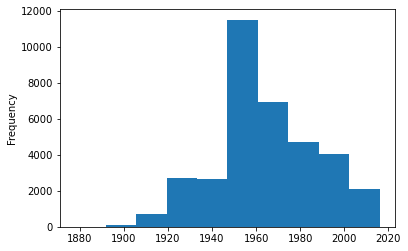

In [18]:
train.yearbuilt.plot.hist()

In [21]:
plot_list_explore = ["bedroomcnt", "bathroomcnt", "fullbathcnt", "taxamount", "taxvaluedollarcnt", "yearbuilt", "unitcnt", "fips", "calculatedfinishedsquarefeet", "longitude", "latitude"]

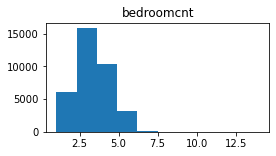

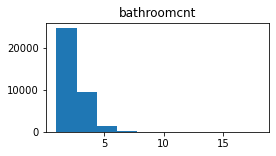

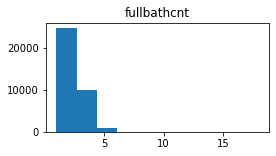

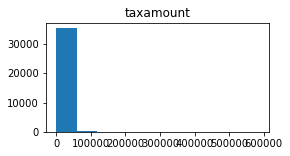

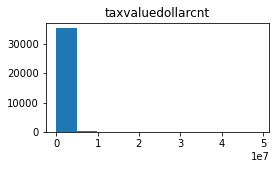

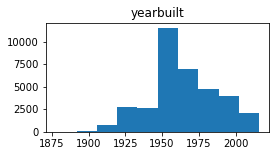

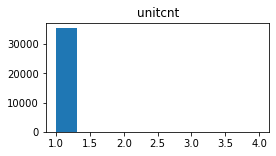

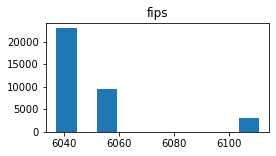

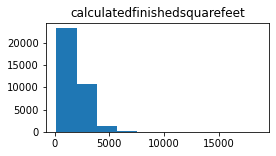

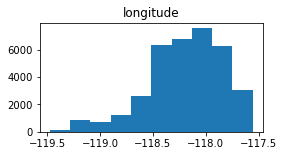

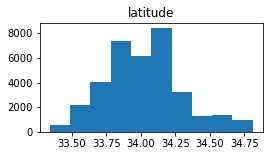

In [22]:
for col in plot_list_explore:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

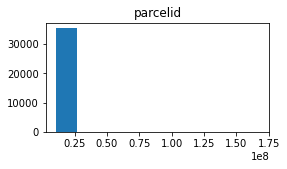

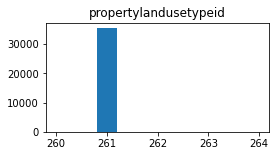

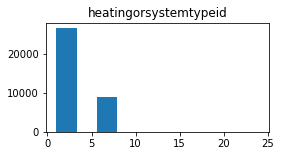

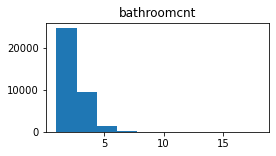

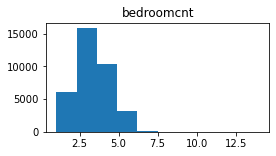

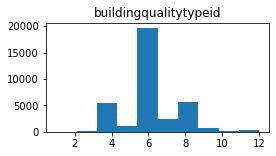

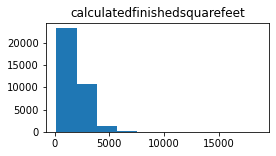

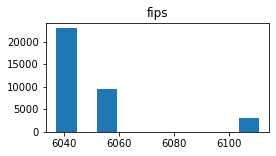

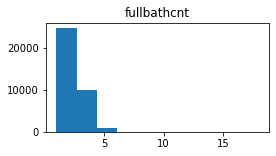

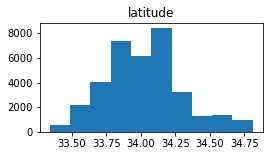

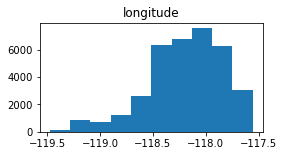

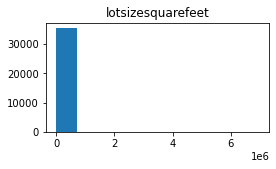

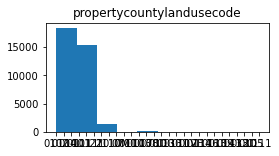

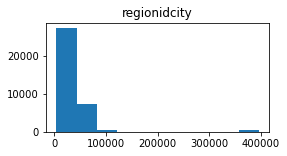

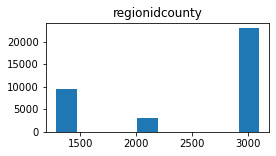

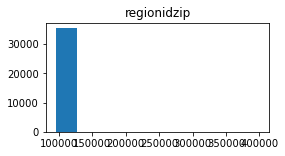

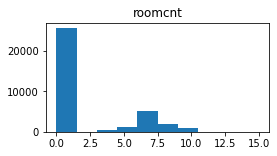

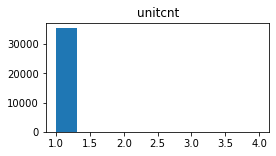

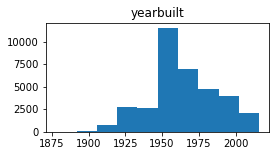

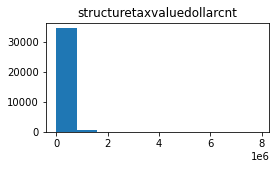

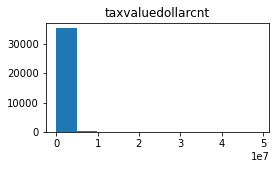

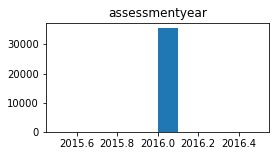

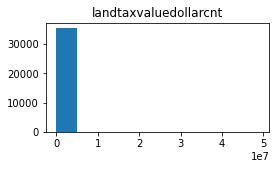

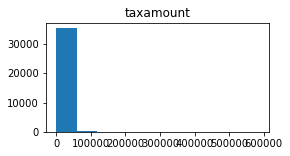

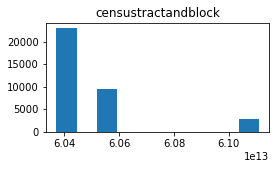

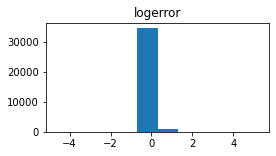

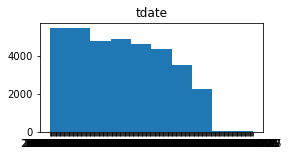

In [23]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [30]:
# converting fips code to int. Will need to convert to string if I import into Tableau.
train['fips'] = train['fips'].astype('int')

In [31]:
train.fips.value_counts(dropna = False)

6037    22966
6059     9599
6111     2960
Name: fips, dtype: int64

In [ ]:
train['county'] = if train.fips

In [26]:
if train.fips == 6037

In [38]:
# Setting the alpha:

alpha = .05

#### Fips codes key:
6037 = Los Angeles County

6059 = Orange County

6111 = Ventura County


In [ ]:
# train.loc[(train.fips == 6037), 'fips'] == 'Los Angeles County'
# train.loc[(train.fips == 6059), 'fips'] == 'Orange County'
# train.loc[(train.fips == 6111), 'fips'] == 'Ventura County'

In [59]:
conditions = [
    (train['fips'] == 6037),
    (train['fips'] == 6059),
    (train['fips'] == 6111)
    ]

county_list = ['Los Angeles', 'Orange', 'Ventura']

train['county'] = np.select(conditions, county_list)
train.shape

(35525, 28)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35525 entries, 2002 to 36494
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      35525 non-null  int64  
 1   propertylandusetypeid         35525 non-null  float64
 2   heatingorsystemtypeid         35525 non-null  float64
 3   bathroomcnt                   35525 non-null  float64
 4   bedroomcnt                    35525 non-null  float64
 5   buildingqualitytypeid         35525 non-null  float64
 6   calculatedfinishedsquarefeet  35525 non-null  float64
 7   fips                          35525 non-null  int64  
 8   fullbathcnt                   35525 non-null  float64
 9   latitude                      35525 non-null  float64
 10  longitude                     35525 non-null  float64
 11  lotsizesquarefeet             35525 non-null  float64
 12  propertycountylandusecode     35525 non-null  object 
 13

In [61]:
train.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,county
2002,10947165,261.0,2.0,3.0,3.0,8.0,2273.0,6037,3.0,34.189628,-118.293775,7467.0,0102,396054.0,3101.0,96433.0,0.0,1.0,1937,274117.0,913724.0,2016.0,639607.0,10048.09,6.037310e+13,0.030392,2017-01-10,Los Angeles
65683,10920910,261.0,7.0,2.0,3.0,6.0,1656.0,6037,2.0,34.225516,-118.358875,5982.0,0104,12447.0,3101.0,96375.0,0.0,1.0,1950,50745.0,70394.0,2016.0,19649.0,989.63,6.037102e+13,0.671934,2017-08-11,Los Angeles
40224,11015158,261.0,2.0,4.0,5.0,8.0,2260.0,6037,4.0,34.294273,-118.503196,13749.0,0100,12447.0,3101.0,96370.0,0.0,1.0,1961,66668.0,109724.0,2016.0,43056.0,1532.36,6.037107e+13,0.023461,2017-05-26,Los Angeles
24802,12486065,261.0,7.0,1.0,3.0,4.0,1092.0,6037,1.0,33.846405,-118.120067,5000.0,0100,12292.0,3101.0,96213.0,0.0,1.0,1950,100000.0,500000.0,2016.0,400000.0,6113.08,6.037571e+13,0.002005,2017-04-10,Los Angeles
48312,11071671,261.0,2.0,4.0,4.0,7.0,3473.0,6037,4.0,34.265126,-118.580861,10301.0,0100,12447.0,3101.0,96346.0,0.0,1.0,1983,327160.0,768661.0,2016.0,441501.0,9419.42,6.037113e+13,0.098492,2017-06-20,Los Angeles


### County breakdown

In [62]:
la_df = train[train.county == "Los Angeles"]
ven_df = train[train.county == "Ventura"]
o_df = train[train.county == "Orange"]

print(la_df.shape)
print(ven_df.shape)
print(o_df.shape)

(22966, 28)
(2960, 28)
(9599, 28)


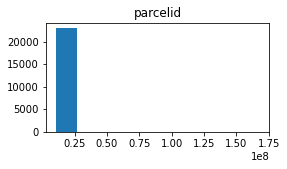

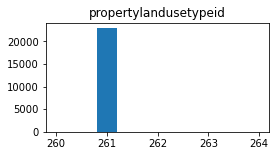

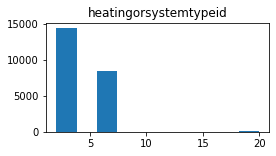

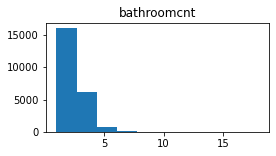

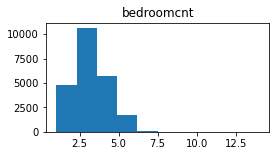

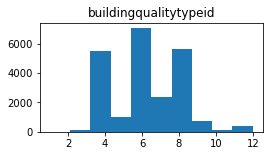

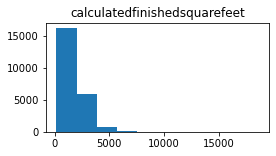

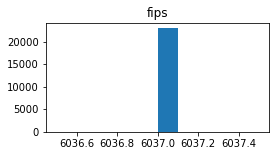

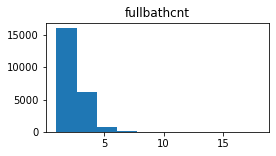

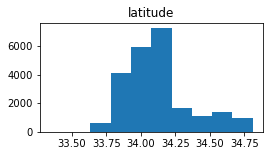

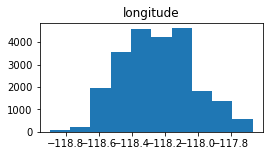

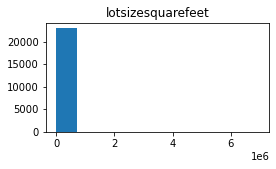

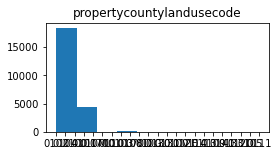

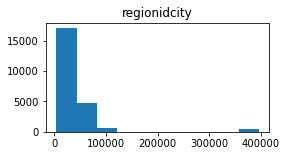

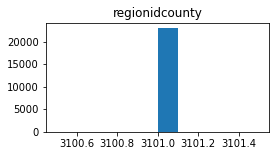

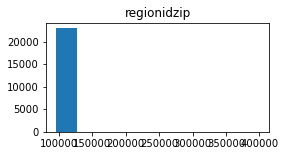

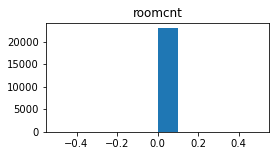

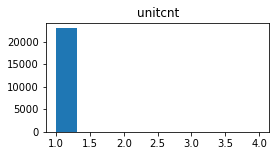

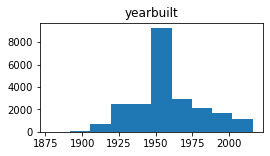

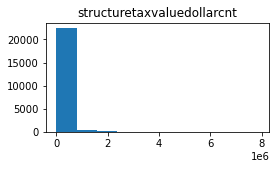

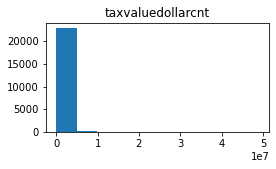

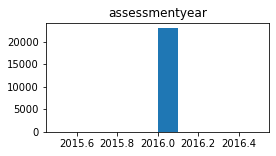

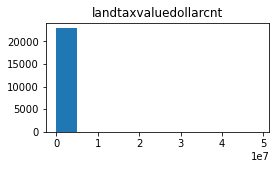

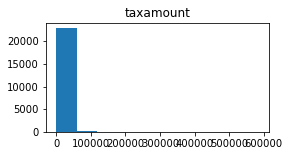

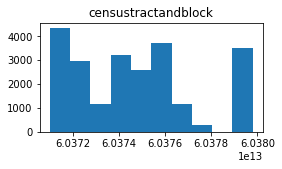

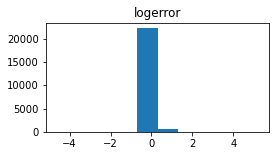

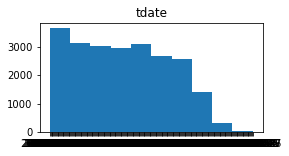

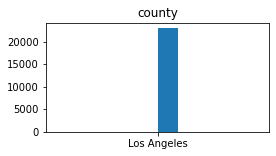

In [63]:
for col in la_df.columns:
    plt.figure(figsize = (4,2))
    plt.hist(la_df[col])
    plt.title(col)
    plt.show()

#### Question 1: 
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### Hypothesis:

$ H_0 $: `logerror` **is not** different between the three counties

$ H_a $: `logerror` **is** different between the three counties

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

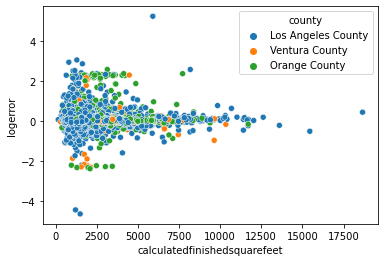

In [55]:
# For a simple visual answer, I'm going to use a scatterplot, with logerror being the value.

sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = train, hue = 'county')

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

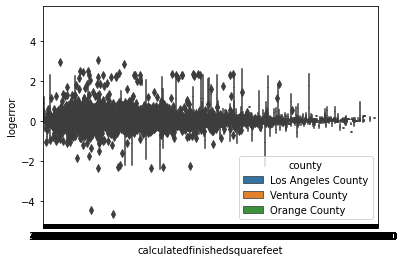

In [57]:
sns.boxplot(x = 'calculatedfinishedsquarefeet', y = 'logerror', data = train, hue = 'county')

<AxesSubplot:xlabel='county', ylabel='logerror'>

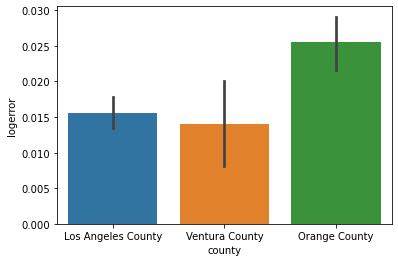

In [58]:
sns.barplot(data = train, x = 'county', y = 'logerror')

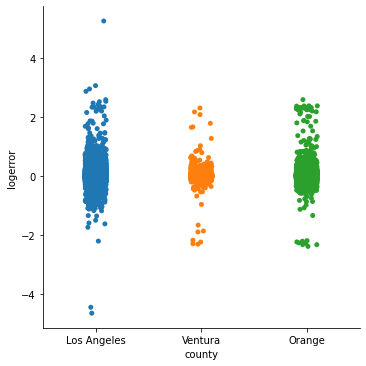

In [64]:
sns.catplot(x = 'county', y = 'logerror', data = train)

<AxesSubplot:xlabel='county', ylabel='logerror'>

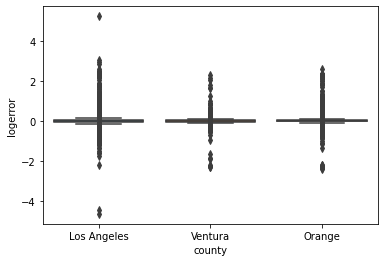

In [65]:
sns.boxplot(x = 'county', y = 'logerror', data = train)

#### Attempting ANOVA

In [67]:
from scipy.stats import f_oneway

f, p = f_oneway(la_df.logerror, ven_df.logerror, o_df.logerror)
p

6.547257431960985e-06

In [70]:
# Levene test, which talks about variance (I think)

stats.levene(la_df.logerror, ven_df.logerror)

LeveneResult(statistic=29.192020984937223, pvalue=6.612577645107485e-08)

In [43]:
observed = pd.crosstab(train.logerror, train.county)
observed.head()

county,Los Angeles County,Orange County,Ventura County
logerror,,,
-4.655420,1,0,0
-4.453964,1,0,0
-2.387800,0,1,0
-2.330162,0,1,0
-2.327432,0,1,0


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1 0 0]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
---
Expected

[[0.64647431 0.27020408 0.0833216 ]
 [0.64647431 0.27020408 0.0833216 ]
 [0.64647431 0.27020408 0.0833216 ]
 ...
 [0.64647431 0.27020408 0.0833216 ]
 [0.64647431 0.27020408 0.0833216 ]
 [0.64647431 0.27020408 0.0833216 ]]
---

chi^2 = 71050.0000
p     = 0.2632


#### Takeaway:

The p-value is far greater than our null value so we would fail to reject the null hypothesis

### Hypothesis:

$ H_0 $: There **is no** difference between `calculatedfinishedsquarefeet` on average and `yearbuilt` > 2012

$ H_a $: There **is** a difference between `calculatedfinishedsquarefeet` on average and `yearbuilt` > 2012

In [50]:
# Going to use a two sample t-test:

x1 = train[train.yearbuilt >= 2012]
x2 = train[train.yearbuilt < 2012]

x1.shape, x2.shape

((359, 28), (35166, 28))